In [21]:
from Codigo import *
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix, lag_plot
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import warnings
sn.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
Datos = EleccionDatos('../../Alemania_Reducida.csv', 'Inversi')

['Inversiones de cartera, entrada neta de capital (balanza de pagos, US$ a precios actuales)', 'Inversiones de cartera, neta (balanza de pagos, US$ a precios actuales)', 'Inversión extranjera directa, salidas netas (BDP, USD a precios actuales)', 'Inversión en energía con participación privada (US$ a precios actuales)', 'Inversiones en agua y servicios sanitarios con participación privada (US$ a precios actuales)', 'Inversión neta en activos no financieros (% del PIB)', 'Inversión extranjera directa, entrada neta de capital (balanza de pagos, US$ a precios actuales)', 'Inversión neta en activos no financieros (UMN actual)', 'Inversión extranjera directa, salida neta de capital (% del PIB)', 'Inversión en transporte con participación privada (US$ a precios actuales)', 'Inversiones de cartera, bonos (PPG +PNG) (NFL, US$ a precios actuales)', 'Inversión extranjera directa, entrada neta de capital (% del PIB)', 'Inversión extranjera directa, neta (balanza de pagos, US$ a precios actuales)'

In [5]:
dt = Datos[['PIB (US$ a precios actuales)','Gasto de consumo final (US$ a precios actuales)','Gasto nacional bruto (UMN a precios actuales)']].dropna(axis = 0)
dt.info()
dt.columns = ['PIB','Consumo','Gasto']
dt = dt.reset_index()
dt['fecha'] = dt['2']
dt.drop('2', axis = 1, inplace= True)
dt['fecha'] = pd.to_datetime(dt['fecha'], format='%Y')
dt['fecha'] = dt['fecha'] + pd.DateOffset(days = 364)
dt.set_index('fecha', inplace= True)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   PIB (US$ a precios actuales)                     53 non-null     float64
 1   Gasto de consumo final (US$ a precios actuales)  53 non-null     float64
 2   Gasto nacional bruto (UMN a precios actuales)    53 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


In [6]:
for i in dt.columns:
    dt[i] = np.log(dt[i])


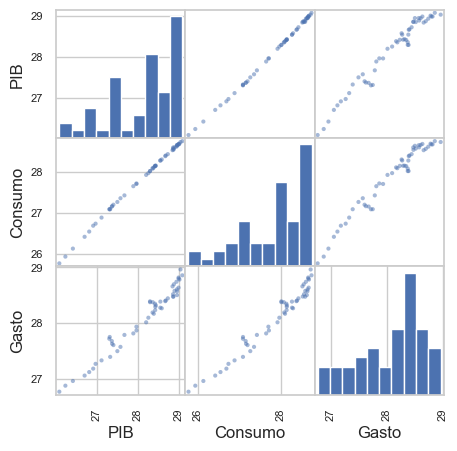

In [7]:
scatter_matrix(dt, figsize=(5,5))
plt.show()

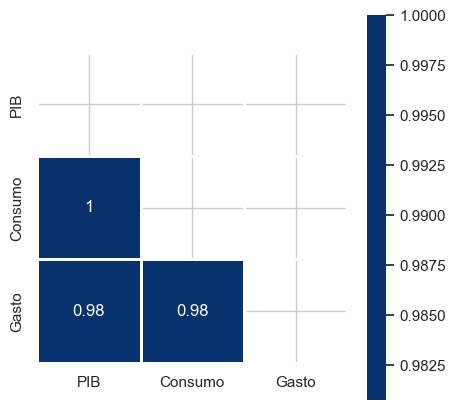

In [8]:
corr = dt.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize = (5,5))
sn.heatmap(corr, mask=mask, cmap ='Blues', vmax=1, center = 0, square= True, linewidths= 1, annot= True)
plt.show()

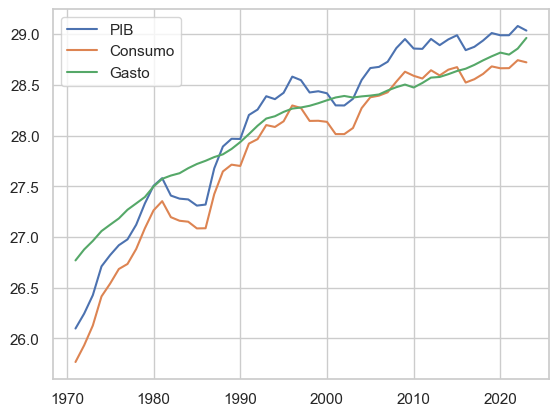

In [9]:

plt.plot(dt, label = dt.columns)
plt.legend()
plt.show()

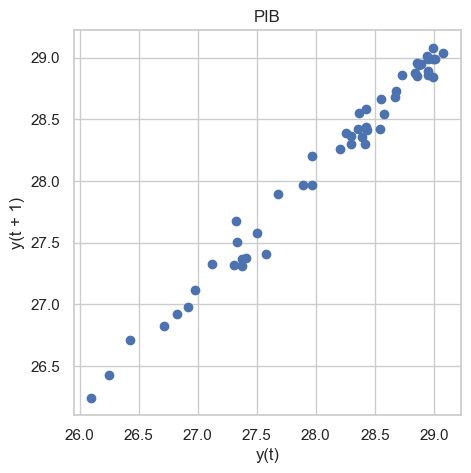

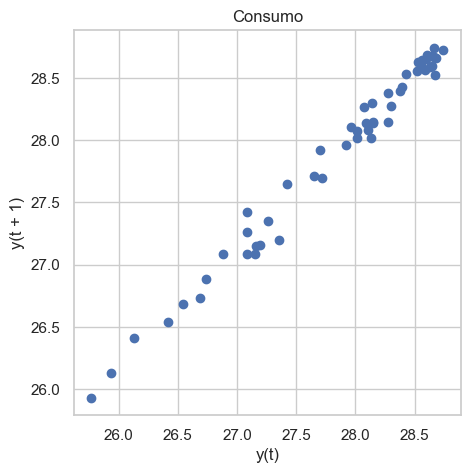

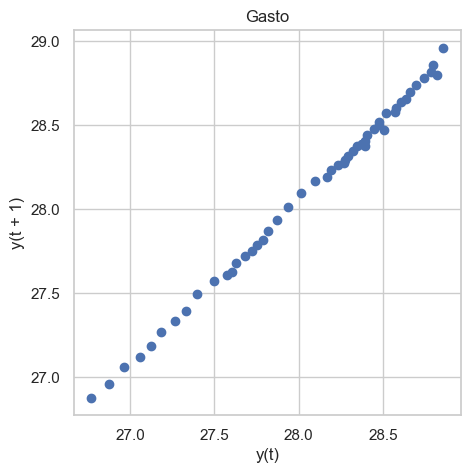

In [10]:

for i in dt.columns:
    plt.figure(figsize=(5,5))
    lag_plot(dt[i])
    plt.title(i)
    plt.show()

In [24]:
model = VAR(dt)
orden = model.select_order(maxlags=5)
optimal = orden.selected_orders
for i in optimal:
    print(f'{i}: {optimal[i]}')

aic: 2
bic: 1
hqic: 1
fpe: 2


In [25]:
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     18:18:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -20.0261
Nobs:                     51.0000    HQIC:                  -20.5175
Log likelihood:           334.851    FPE:                9.11177e-10
AIC:                     -20.8215    Det(Omega_mle):     6.19483e-10
--------------------------------------------------------------------
Results for equation PIB
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              2.086500         2.047726            1.019           0.308
L1.PIB             4.047092         1.289360            3.139           0.002
L1.Consumo        -2.995864         1.315797           -2.277           0.

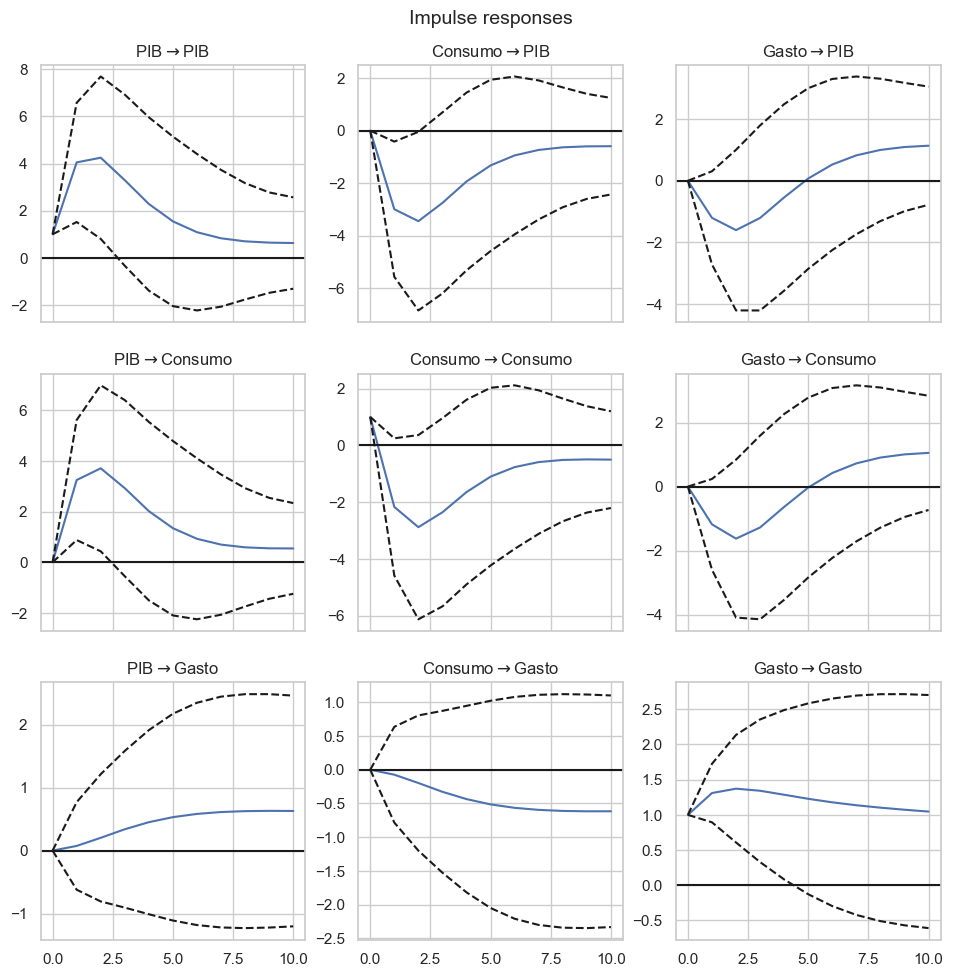

In [35]:
irf = result.irf()
irf.plot(orth = False)
plt.show()

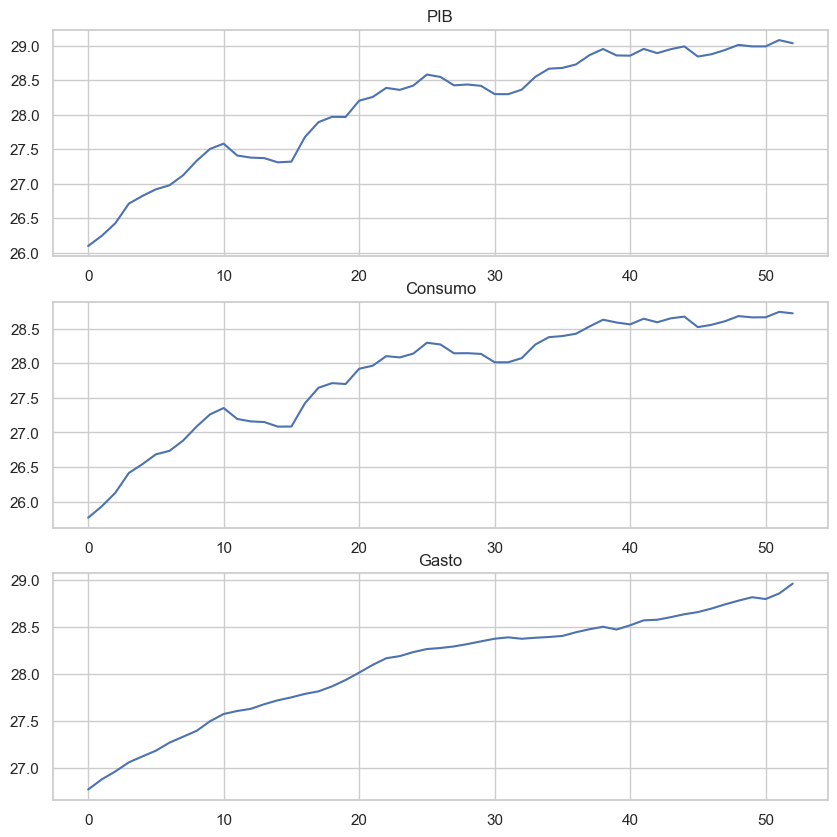

In [29]:
result.plot()
plt.show()

In [42]:
results2 = model.fit(maxlags=5, ic = 'aic')
lag_order = results2.k_ar
results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     18:35:05
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -20.0261
Nobs:                     51.0000    HQIC:                  -20.5175
Log likelihood:           334.851    FPE:                9.11177e-10
AIC:                     -20.8215    Det(Omega_mle):     6.19483e-10
--------------------------------------------------------------------
Results for equation PIB
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              2.086500         2.047726            1.019           0.308
L1.PIB             4.047092         1.289360            3.139           0.002
L1.Consumo        -2.995864         1.315797           -2.277           0.

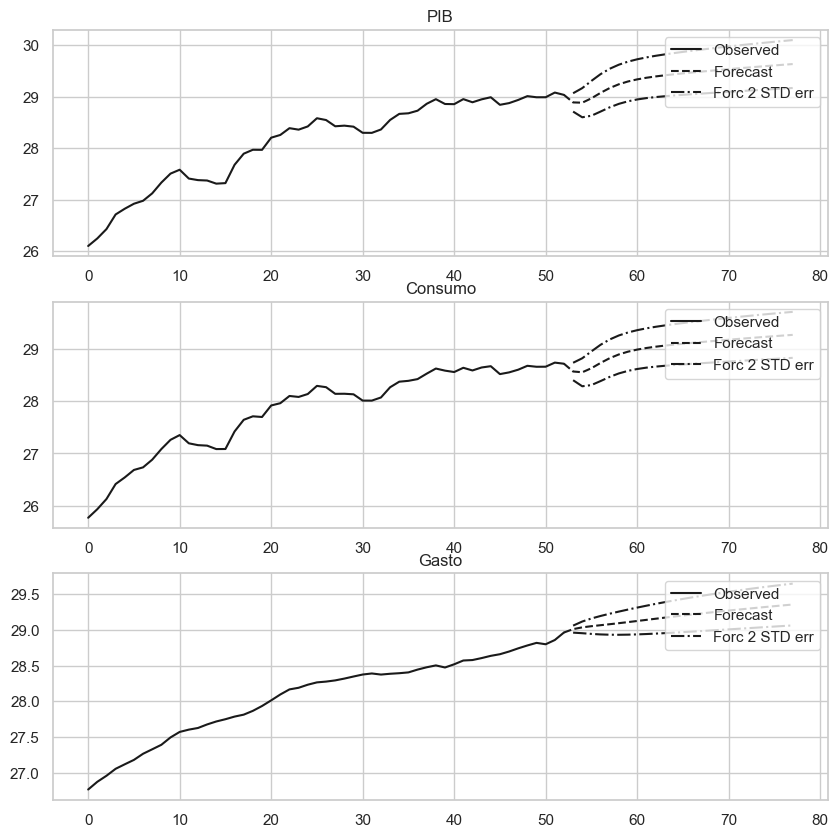

In [44]:
fig = results2.plot_forecast(25)
plt.show()

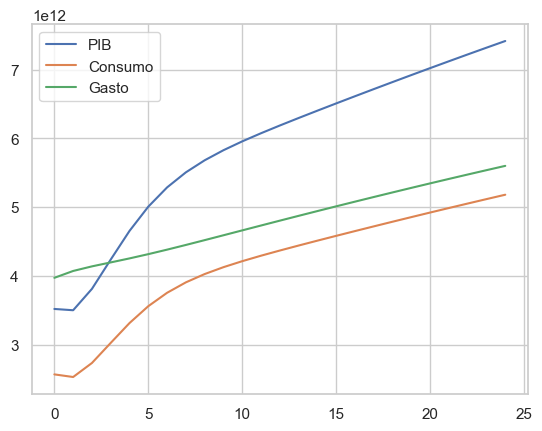

In [39]:
plt.plot(np.exp(results2.forecast(dt.values[-lag_order:],25)), label = dt.columns)
plt.legend()
plt.show()